In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset = pd.get_dummies(dataset, dtype=int, drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [8]:
dependent = dataset[['charges']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent, dependent, test_size =0.30, random_state=0)

In [10]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [11]:
#model Creation
from sklearn.tree import DecisionTreeRegressor


In [12]:
#criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# best, random
regressor = DecisionTreeRegressor(criterion="poisson", max_features="log2",splitter="best" )

In [13]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_features='log2')

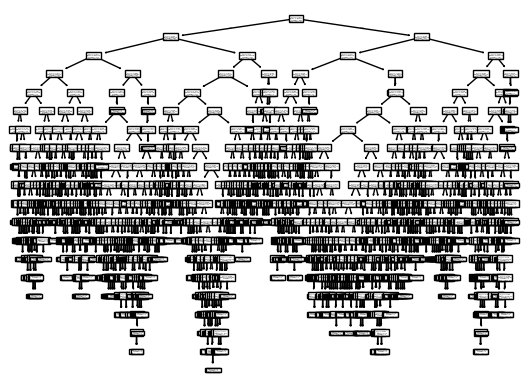

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
y_pred

array([10231.4999  ,  8930.93455 , 46151.1245  , 14410.9321  ,
        8627.5411  , 21984.47061 ,  1615.7667  , 10381.4787  ,
        4618.0799  ,  5253.524   ,  7228.21565 , 10355.641   ,
        8988.15875 ,  4571.41305 , 35147.52848 , 11741.726   ,
       12142.5786  ,  3292.52985 ,  6748.5912  , 33750.2918  ,
       21978.6769  , 12646.207   ,  9625.92    , 29523.1656  ,
        1826.843   ,  7443.64305 ,  3260.199   ,  8538.28845 ,
        3353.284   , 25333.33284 ,  6184.2994  , 10450.552   ,
       21797.0004  , 11365.952   ,  3208.787   , 13126.67745 ,
        8978.1851  , 39774.2763  , 47291.055   ,  2855.43755 ,
       21984.47061 ,  2866.091   , 19361.9988  , 60021.39897 ,
       38792.6856  ,  3579.8287  , 11305.93455 ,  7046.7222  ,
        4719.52405 , 10156.7832  ,  2020.5523  ,  1252.407   ,
       23807.2406  , 46661.4424  , 11856.4115  ,  2689.4954  ,
        3292.52985 ,  8782.469   , 10096.97    , 12142.5786  ,
        1842.519   , 40720.55105 , 15161.5344  , 25333.

In [17]:
from sklearn.metrics import r2_score

In [18]:
r_score = r2_score(y_test,y_pred)

In [19]:
r_score

0.6037872595607678